In [1]:
import numpy as np
import cv2
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
dataset_path = os.getcwd() + "/dataset"
exam = "24070624_07_2019_09_25_42.mp4"
file = "{}/{}".format(dataset_path, exam)
file

'/Users/marcosvsilva/Projects/ProjectPupilometer/pupilometer/dataset/24070624_07_2019_09_25_42.mp4'

In [3]:
video = cv2.VideoCapture(file)

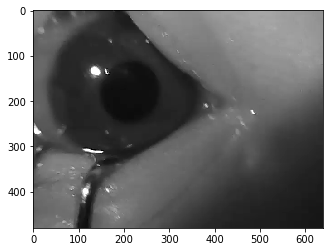

In [4]:
ret, frame = video.read()
original = np.copy(frame)
plt.imshow(original)

In [5]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

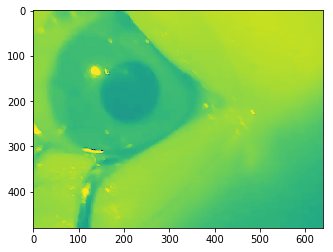

In [6]:
frame = np.array(255 * (frame / 255) ** 0.2, dtype='uint8')
plt.imshow(frame)

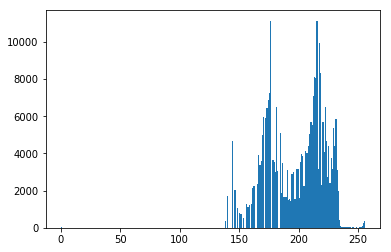

In [7]:
plt.hist(frame.ravel(),256,[0,256])
plt.show()

In [8]:
new_image = np.zeros(frame.shape)
li, co = frame.shape
for i in range(0, li):
    for j in range(0, co):
        if frame[i][j] in range(100, 220):
            new_image[i][j] = frame[i][j]

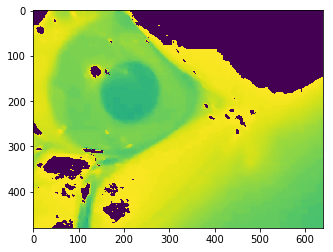

In [9]:
plt.imshow(new_image)

In [10]:
for i in range(0, li):
    for j in range(0, co):
        if new_image[i][j] == 0:
            frame[i][j] = 0

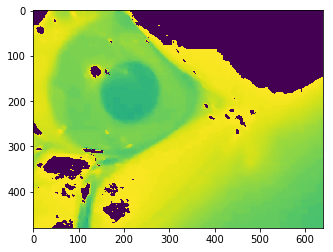

In [11]:
plt.imshow(frame)

In [12]:
edge = cv2.Canny(frame, threshold1=10, threshold2=40)

In [13]:
pupil = cv2.HoughCircles(edge, cv2.HOUGH_GRADIENT, dp=30, minDist=40, param1=10, param2=20,
                         minRadius=40, maxRadius=50)

In [14]:
print(pupil)

[[[105.  375.   41.5]
  [165.  435.   41.5]
  [ 75.  345.   41.5]
  [165.  375.   41.5]
  [ 75.  435.   41.5]
  [165.  285.   41.5]
  [285.  105.   41.5]
  [225.   75.   41.5]
  [135.  105.   41.5]
  [405.  135.   41.5]
  [405.  255.   41.5]
  [195.  195.   41.5]
  [435.  195.   41.5]
  [315.  135.   41.5]
  [345.   45.   41.5]
  [105.  165.   41.5]
  [345.  195.   41.5]
  [375.  105.   41.5]
  [255.  255.   41.5]
  [315.  315.   41.5]
  [555.  225.   41.5]
  [555.  135.   41.5]
  [495.  225.   41.5]
  [645.  195.   41.5]
  [465.  105.   41.5]
  [285.  225.   41.5]
  [495.  135.   41.5]
  [615.  105.   41.5]]]


In [15]:
if pupil is not None:
    pupil = np.uint16(np.around(pupil))

    for i in pupil[0, :]:
        cv2.circle(frame, (i[0], i[1]), i[2], (255, 255, 0), 2)

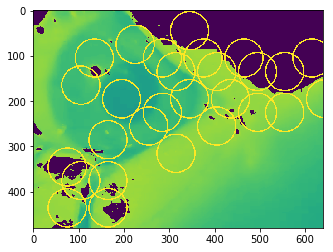

In [16]:
plt.imshow(frame)